# How did Twitter react to the Coronavirus pandemic?

In [59]:
import sys
!{sys.executable} -m pip install --upgrade pip

Requirement already up-to-date: pip in /Users/buinhi/anaconda3/lib/python3.7/site-packages (20.2.2)


In [60]:
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install pyLDAvis

In [61]:
import re
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import gensim
import numpy as np
from pprint import pprint
import seaborn as sns
import matplotlib.colors as mcolors

In [62]:
df = pd.read_csv('2020-03-30 Coronavirus Tweets.CSV')

In [63]:
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244414033547030529,1054394794305302528,2020-03-30T00:00:00Z,Ecodiariozac,"#Entérate Gobierno del Estado, a través de sus...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,679,991,NaN,2018-10-22T15:31:23Z,False,es
1,1244414034411171845,31023547,2020-03-30T00:00:00Z,Reporte_Indigo,"#PorSiNoLoViste | Si eres un cliente cumplido,...",TweetDeck,NaN,NaN,NaN,False,...,8,NaN,NaN,NaN,898366,621,NaN,2009-04-14T01:47:10Z,True,es
2,1244414033333227523,296096105,2020-03-30T00:00:00Z,tv1_rtm,Pengurusan kes-kes POSITIF COVID-19\n\n#Perint...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,38609,534,NaN,2011-05-10T05:57:18Z,False,in
3,1244414034423590913,2963716598,2020-03-30T00:00:00Z,ajplusespanol,"Médico cirujano, doctor en epidemiología y sub...",Twitter Media Studio,NaN,NaN,NaN,False,...,24,NaN,NaN,NaN,114290,668,NaN,2015-01-07T18:44:40Z,True,es
4,1244414033672855552,4856038638,2020-03-30T00:00:00Z,BlogDelRegio,La @NlSalud implementará un protocolo de inves...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,6785,1523,NaN,2016-02-03T22:48:13Z,False,es


In [64]:
df_en = df[df.lang == 'en']
df_en.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
10,1244414032964190208,15079924,2020-03-30T00:00:00Z,WFPUSA,#DidYouKnow: @WFP is 100% voluntarily funded: ...,Twitter for Advertisers,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,25816,2797,NaN,2008-06-11T01:05:43Z,True,en
12,1244414035698814977,1925199355,2020-03-30T00:00:00Z,MailMyStatement,"To treat COVID-19, administration expected to ...",eClincher,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5932,4915,NaN,2013-10-02T01:01:01Z,False,en
13,1244414036038561792,1103013448659566592,2020-03-30T00:00:00Z,Derek_Griffin1,"To treat COVID-19, administration expected to ...",eClincher,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1302,1159,NaN,2019-03-05T19:24:33Z,False,en
14,1244414035660947456,1968929071,2020-03-30T00:00:00Z,MDOT_BWB,@MichiganDOT will not accept cash transactions...,TweetDeck,NaN,20542307.0,MichiganDOT,False,...,1,NaN,NaN,NaN,4422,16,NaN,2013-10-18T13:40:20Z,True,en
15,1244414035396788226,20605323,2020-03-30T00:00:00Z,KTVOTV,Health experts say the risks are very low that...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,9139,987,NaN,2009-02-11T17:37:33Z,True,en


In [65]:
df_en_random= df_en.sample(n=5000)
df_en_random.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
88848,1244482935513726976,1223859762237825025,2020-03-30T04:33:47Z,RichardOnlineC1,Just upload a vid on coping with covid. It’s a...,Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,31,37,NaN,2020-02-02T06:45:45Z,False,en
451491,1244706073669500929,754939513,2020-03-30T19:20:28Z,MarshallColman,Heard on @Channel4News that over 70s are advis...,Twitter for Android,NaN,NaN,NaN,False,...,0,GB,"Saint Albans, East",city,835,1818,NaN,2012-08-13T11:10:19Z,False,en
499312,1244731524836024320,938533034659168256,2020-03-30T21:01:36Z,openletterbot,🖋 Support Janelle by signing “Why You Must Act...,Resistbot Open Letters,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,16581,3,NaN,2017-12-06T22:18:07Z,True,en
429474,1244692333712506880,166663254,2020-03-30T18:25:52Z,Ignoto2011,#America has underestimated the warnings of Ch...,TweetCaster for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,236,562,NaN,2010-07-14T18:22:38Z,False,en
275591,1244608530021330947,42936596,2020-03-30T12:52:51Z,joshforwood,"If you could be anywhere right now, where woul...",Twitter for Android,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,600,633,NaN,2009-05-27T17:55:11Z,False,en


In [66]:
# create a document of all tweets
doc_complete = []
for i in df_en_random.text:
    doc_complete.append(i)
#doc_complete

In [67]:
# remove stopwords from all tweets / documents and add to the list of stopwords
stop = stopwords.words('english')
newstop =["Covid_19","COVID19","CO","coronavirus","covid","dm","way","american","want","make","first","flt","jfk","one","every","also"
          "would","plane","aa","dfw","still","us","our","ca","your","amp","u","http","https","get","delivered","deliver","delivery"
          "please","call","could","jetblue","http", "yes", "dallas", "let","even", "take", "said","anything", "dca", "flightr",
          "must", "really", "gt", "sfo", "may", "lots", "im", "much", "rt", "lga", "dc", "san", "say", "yr", "ur", "uk", "fyi",
          "total","people","tomorrow","hold","look","think","hour","hours","guys","ever","always","everyone","would","cases","last"]
stop.extend(newstop)

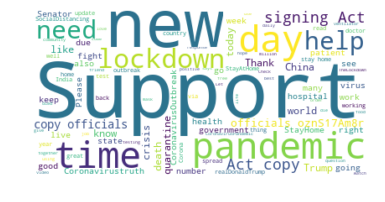

In [68]:
wc = WordCloud(background_color='white'
               ,max_words=100
               ,stopwords=stop).generate(' '.join(doc_complete))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
# clean data of stop, irrelevant and redundant words
def clean(text):
    tokenized = nltk.word_tokenize(text)
    stop_free = [i.lower() for i in tokenized if i.lower() not in stop and i.isalpha() and len(i)>3]
    return stop_free

cleaned = [clean(i) for i in doc_complete]
#print(cleaned)

In [70]:
# create a dictionary of words in the tweets /  documents
dictionary = corpora.Dictionary(cleaned)
#for i in dictionary:
    #print(i,dictionary[i])

In [71]:
#index the words and calculate the frequency of each word in each sentence
document_term_matrix = [dictionary.doc2bow(i) for i in cleaned]
#print(document_term_matrix)

In [72]:
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(document_term_matrix, num_topics=10, id2word = dictionary)
print(ldamodel)

LdaModel(num_terms=15642, num_topics=10, decay=0.5, chunksize=2000)


In [73]:
# create 10 topics
top_10 = ldamodel.print_topics(num_topics=10, num_words=10)
top_10

[(0,
  '0.008*"pandemic" + 0.006*"like" + 0.006*"news" + 0.006*"deaths" + 0.005*"country" + 0.005*"nigeria" + 0.005*"trump" + 0.004*"crisis" + 0.004*"hospital" + 0.004*"patients"'),
 (1,
  '0.008*"help" + 0.008*"support" + 0.005*"many" + 0.005*"rondesantisfl" + 0.005*"flapol" + 0.005*"sayfie" + 0.005*"officials" + 0.005*"copy" + 0.004*"quarantine" + 0.004*"money"'),
 (2,
  '0.007*"help" + 0.006*"lockdown" + 0.006*"support" + 0.005*"pandemic" + 0.005*"health" + 0.004*"minister" + 0.004*"maybe" + 0.004*"find" + 0.004*"states" + 0.004*"crisis"'),
 (3,
  '0.006*"thank" + 0.006*"know" + 0.005*"going" + 0.005*"help" + 0.005*"social" + 0.004*"pandemic" + 0.004*"world" + 0.004*"doctors" + 0.004*"work" + 0.004*"virus"'),
 (4,
  '0.015*"home" + 0.012*"stay" + 0.010*"please" + 0.008*"help" + 0.007*"masks" + 0.007*"stayhome" + 0.005*"spread" + 0.005*"pandemic" + 0.005*"need" + 0.005*"hard"'),
 (5,
  '0.013*"march" + 0.013*"know" + 0.007*"real" + 0.007*"thelockdown" + 0.006*"deaths" + 0.005*"week" 

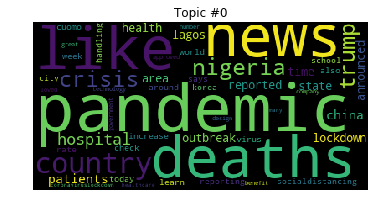

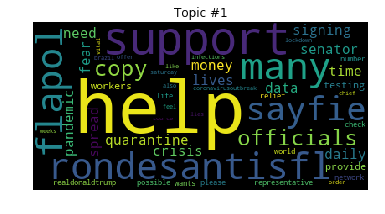

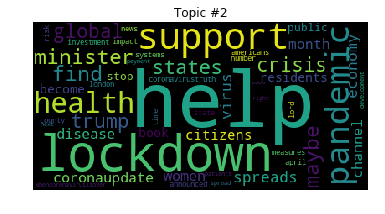

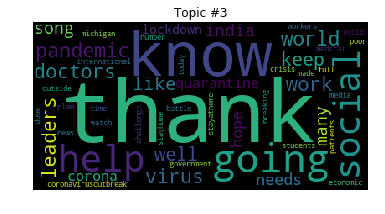

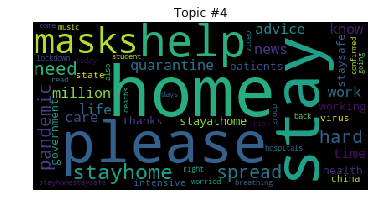

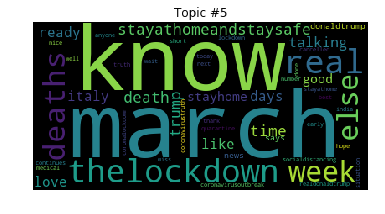

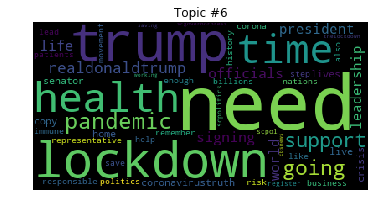

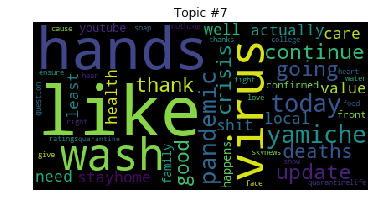

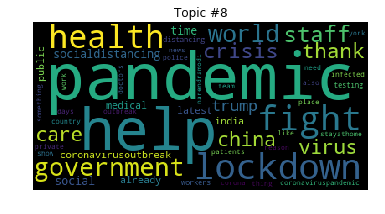

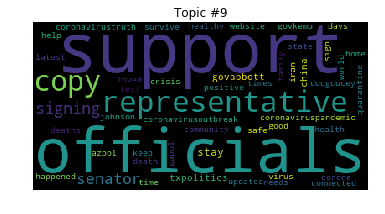

In [74]:
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel .show_topic(t, 50))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show() 

The Dominant topic and its percentage contribution in each Tweet - 
In LDA models, each Tweet is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.



In [75]:
def format_topics_sentences(ldamodel=None, corpus=document_term_matrix, texts=doc_complete):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=document_term_matrix, texts=cleaned)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.8204,"pandemic, help, lockdown, fight, health, gover...","[upload, coping, already, necessary, skills, e..."
1,1,6.0,0.7612,"need, trump, lockdown, health, time, pandemic,...","[heard, advised, self, isolate, months, govern..."
2,2,9.0,0.6578,"support, officials, representative, copy, sign...","[support, janelle, signing, copy, officials, g..."
3,3,8.0,0.9247,"pandemic, help, lockdown, fight, health, gover...","[america, underestimated, warnings, china, ita..."
4,4,6.0,0.8710,"need, trump, lockdown, health, time, pandemic,...","[anywhere, right, presuming, issue, isolation,..."
5,5,7.0,0.8596,"like, hands, virus, wash, yamiche, today, pand...","[coworkatures, caricatures, coworkers, past, p..."
6,6,6.0,0.6554,"need, trump, lockdown, health, time, pandemic,...","[blood, realdonaldtrump, hands, going, waterfall]"
7,7,4.0,0.8714,"home, stay, please, help, masks, stayhome, spr...","[stay, safe, stay, home, stay, away]"
8,8,9.0,0.8149,"support, officials, representative, copy, sign...","[india, suffer, visuals, emerge, migrant, work..."
9,9,3.0,0.7800,"thank, know, going, help, social, pandemic, wo...","[kennyfarq, joannaccherry, side, scotland, fac..."


When it comes to the keywords in the topics, the importance (weights) of the keywords matters. 
Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. 
Often such words turn out to be less important. 


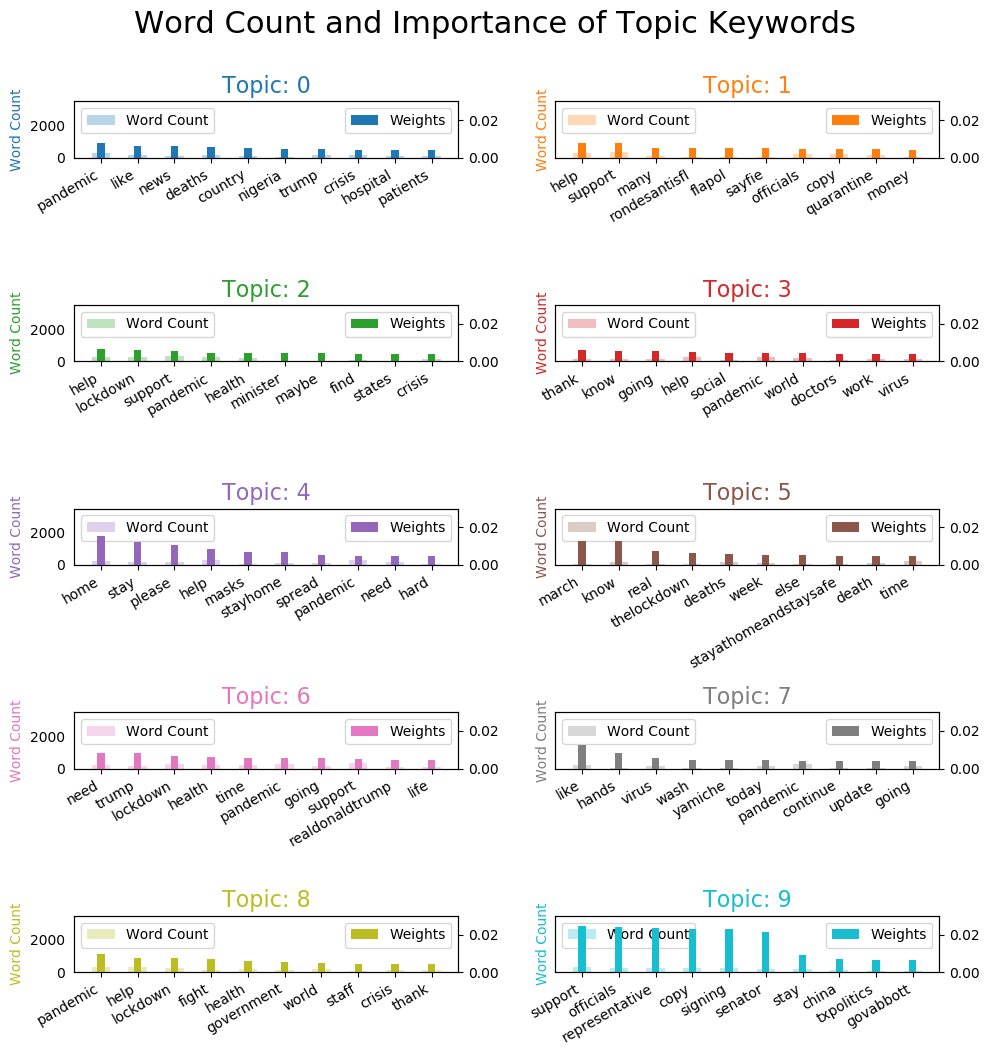

In [76]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in cleaned for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dataf = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(10,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataf.loc[dataf.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [77]:
topics

[(0,
  [('pandemic', 0.0076013724),
   ('like', 0.0063062664),
   ('news', 0.0060847704),
   ('deaths', 0.005843576),
   ('country', 0.005396883),
   ('nigeria', 0.004656542),
   ('trump', 0.004585794),
   ('crisis', 0.004294473),
   ('hospital', 0.0042860964),
   ('patients', 0.0042725145)]),
 (1,
  [('help', 0.007913372),
   ('support', 0.0077080457),
   ('many', 0.00511757),
   ('rondesantisfl', 0.0049597477),
   ('flapol', 0.0049486756),
   ('sayfie', 0.0049483734),
   ('officials', 0.0046163527),
   ('copy', 0.004520234),
   ('quarantine', 0.0044181147),
   ('money', 0.0043424894)]),
 (2,
  [('help', 0.0066052135),
   ('lockdown', 0.005792458),
   ('support', 0.0056514107),
   ('pandemic', 0.0046903943),
   ('health', 0.00460539),
   ('minister', 0.0042784023),
   ('maybe', 0.004277978),
   ('find', 0.0041742777),
   ('states', 0.003941759),
   ('crisis', 0.0037242095)]),
 (3,
  [('thank', 0.0058470066),
   ('know', 0.0057771043),
   ('going', 0.0053648395),
   ('help', 0.00479287

 visualise the information contained in a topic model.

In [78]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, document_term_matrix, dictionary=ldamodel.id2word)
vis

/Users/buinhi/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.051855  0.063355       1        1  13.660622
4      0.004336  0.135758       2        1  12.510175
9     -0.160860 -0.011517       3        1  11.600631
3      0.074180  0.002795       4        1  10.073902
0      0.060864  0.006206       5        1   9.614429
1     -0.080702  0.018288       6        1   9.360886
6     -0.055991  0.002097       7        1   9.283360
7      0.050810 -0.013813       8        1   8.197429
5      0.079567 -0.085929       9        1   8.185108
2     -0.024058 -0.117242      10        1   7.513457, topic_info=     Category        Freq              Term       Total  loglift  logprob
29    Default  209.000000    representative  209.000000  30.0000  30.0000
28    Default  235.000000         officials  235.000000  29.0000  29.0000
24    Default  216.000000              copy  216.000000  28.0000  28.0000
31    Default  217.000000           signing  217.000000  27.0000  27.0000
30    Default  202.000000           senator  202.000000  26.0000  26.0000
32    Default  302.000000           support  302.000000  25.0000  25.0000
68    Default  183.000000              stay  183.000000  24.0000  24.0000
2095  Default   88.000000             march   88.000000  23.0000  23.0000
66    Default  189.000000              home  189.000000  22.0000  22.0000
1203  Default  173.000000              know  173.000000  21.0000  21.0000
201   Default  205.000000              like  205.000000  20.0000  20.0000
62    Default   52.000000             hands   52.000000  19.0000  19.0000
650   Default   52.000000        txpolitics   52.000000  18.0000  18.0000
646   Default   53.000000         govabbott   53.000000  17.0000  17.0000
1657  Default   50.000000              real   50.000000  16.0000  16.0000
280   Default   78.000000             masks   78.000000  15.0000  15.0000
1136  Default   87.000000       thelockdown   87.000000  14.0000  14.0000
522   Default  174.000000             trump  174.000000  13.0000  13.0000
1707  Default   31.000000     rondesantisfl   31.000000  12.0000  12.0000
1533  Default   32.000000            flapol   32.000000  11.0000  11.0000
1538  Default   32.000000            sayfie   32.000000  10.0000  10.0000
61    Default  128.000000             going  128.000000   9.0000   9.0000
2341  Default   42.000000           nigeria   42.000000   8.0000   8.0000
3369  Default   24.000000              wash   24.000000   7.0000   7.0000
6230  Default   23.000000           yamiche   23.000000   6.0000   6.0000
455   Default  165.000000            please  165.000000   5.0000   5.0000
168   Default  105.000000            corona  105.000000   4.0000   4.0000
492   Default   21.000000           talking   21.000000   3.0000   3.0000
1202  Default   51.000000              else   51.000000   2.0000   2.0000
698   Default   28.000000           leaders   28.000000   1.0000   1.0000
...       ...         ...               ...         ...      ...      ...
3820  Topic10   13.568000            become   18.917858   2.2561  -5.7987
566   Topic10   19.145962             maybe   29.866076   2.1438  -5.4543
3745  Topic10   12.800622         residents   18.985733   2.1943  -5.8569
2848  Topic10   13.729047             month   21.268562   2.1508  -5.7869
5911  Topic10   14.306813             women   23.387960   2.0970  -5.7456
3767  Topic10   11.926025        investment   18.126404   2.1698  -5.9276
773   Topic10    9.847970          guidance   14.520779   2.2002  -6.1191
1087  Topic10   11.706016            county   19.809555   2.0624  -5.9463
3762  Topic10   12.591846              book   22.846256   1.9927  -5.8733
1048  Topic10   11.632504              lord   19.750275   2.0591  -5.9526
413   Topic10   17.641224            states   46.011745   1.6298  -5.5361
772   Topic10   18.681852              find   56.444733   1.4828  -5.4788
336   Topic10   13.833205          citizens   32.4965

In [79]:
output=open('tweet_30th.txt','w')
with open('loughran_negative.txt', 'r') as f:
    list_of_neg = [x.lower().strip('\n') for x in f.readlines()]
    negative =' '.join(list_of_neg)

add_stop=['covid-19', 'coronavirus', 'covid', 'region', 'case', 'new', 'cases']

with open('loughran_positive.txt', 'r') as f:
    list_of_pos = [x.lower().strip('\n') for x in f.readlines()]
    positive =' '.join(list_of_pos)



In [80]:
def get_neg(text):
    neg_list = []
    wordlist = (text)
    for n in set(list_of_neg):
        for word in wordlist:
            if word == n:
                neg_list.append(word)
    return neg_list

def get_pos(text):
    pos_list = []
    wordlist= (text)
    for p in set(list_of_pos):
        for word in wordlist:
            if word == p:
                pos_list.append(word)
    return pos_list

def neg_sentiment(text):
    count=0
    wordlist=nltk.word_tokenize(text.lower().strip('\n'))
    for word in wordlist:
        if word in negative:
            count+=1
    return count/len(wordlist)


def pos_sentiment(text):
    count=0
    wordlist=nltk.word_tokenize(text.lower().strip('\n'))
    for word in wordlist:
        if word in positive:
            count+=1
    return count/len(wordlist)

In [81]:
#overall common words
word_list = [word for line in cleaned for word in line]
freq=nltk.FreqDist(word_list)
print(freq.most_common(10))

[('support', 338), ('pandemic', 301), ('help', 289), ('lockdown', 263), ('officials', 246), ('signing', 232), ('copy', 232), ('time', 228), ('representative', 227), ('home', 219)]


In [82]:
#neg common words
neg_list = [' '.join(get_neg(l)) for l in cleaned]
neg_list = ' '.join(neg_list)
neg_list=nltk.word_tokenize(neg_list)
neg_freq = nltk.FreqDist(neg_list)
print(neg_freq.most_common(10))

[('help', 289), ('need', 196), ('crisis', 160), ('fight', 122), ('death', 97), ('outbreak', 90), ('order', 71), ('emergency', 55), ('disease', 40), ('sick', 39)]


In [83]:
pos_list = [' '.join(get_pos(l)) for l in cleaned]
pos_list = ' '.join(pos_list)
pos_list=nltk.word_tokenize(pos_list)
pos_freq = nltk.FreqDist(pos_list)
print(pos_freq.most_common(10))

[('support', 338), ('help', 289), ('home', 219), ('like', 203), ('health', 203), ('please', 172), ('know', 155), ('good', 131), ('thank', 129), ('well', 105)]


In [84]:
def bar_chart(word,count,title,xlabel,ylabel):
    plt.figure(figsize=(7,5))
    plt.bar(word, count, width=0.4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    locs,label = plt.xticks()
    plt.xticks(rotation=45, ha='right')
    plt.show()

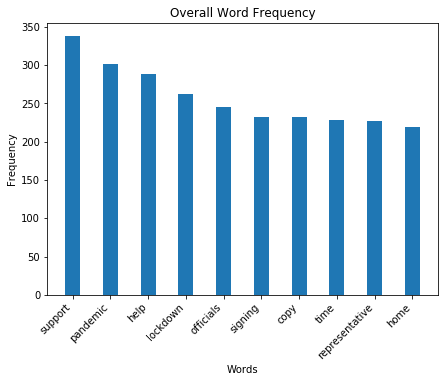

In [85]:
#Overall common
count = [c for (w,c) in freq.most_common(10)]
most10 = [w for (w,c) in freq.most_common(10)]
bar_chart(most10,count,'Overall Word Frequency','Words','Frequency')

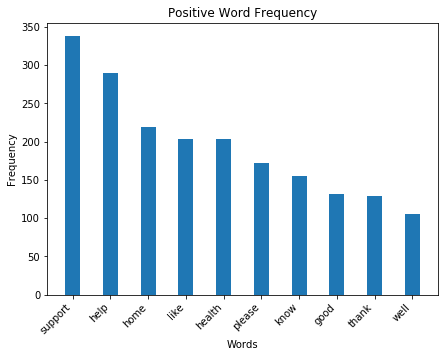

In [86]:
#positive common
count = [c for (w,c) in pos_freq.most_common(10)]
most10 = [w for (w,c) in pos_freq.most_common(10)]
bar_chart(most10,count,'Positive Word Frequency','Words','Frequency')

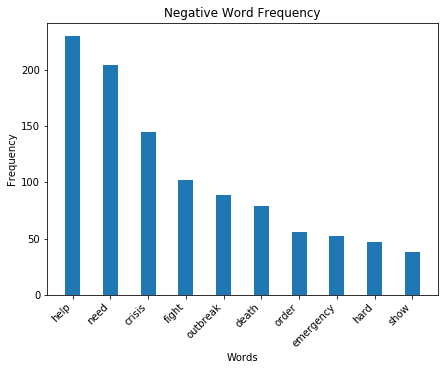

In [37]:
#negative common
count = [c for (w,c) in neg_freq.most_common(10)]
most10 = [w for (w,c) in neg_freq.most_common(10)]
bar_chart(most10,count,'Negative Word Frequency','Words','Frequency')

In [87]:
lda3 = gensim.models.ldamodel.LdaModel
ldamodel3 = lda(document_term_matrix, num_topics=3, id2word = dictionary)
print(ldamodel3)

LdaModel(num_terms=15642, num_topics=3, decay=0.5, chunksize=2000)


In [88]:
# create 3 topics
top_3 = ldamodel3.print_topics(num_topics=3, num_words=10)
top_3

[(0,
  '0.004*"china" + 0.004*"virus" + 0.004*"pandemic" + 0.004*"crisis" + 0.004*"time" + 0.003*"health" + 0.003*"like" + 0.003*"trump" + 0.003*"know" + 0.002*"help"'),
 (1,
  '0.005*"world" + 0.004*"help" + 0.004*"coronavirusoutbreak" + 0.004*"need" + 0.004*"lockdown" + 0.004*"trump" + 0.003*"deaths" + 0.003*"stay" + 0.003*"realdonaldtrump" + 0.003*"pandemic"'),
 (2,
  '0.011*"support" + 0.010*"officials" + 0.009*"signing" + 0.009*"copy" + 0.009*"representative" + 0.009*"senator" + 0.005*"help" + 0.005*"pandemic" + 0.004*"quarantine" + 0.004*"home"')]

In [89]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

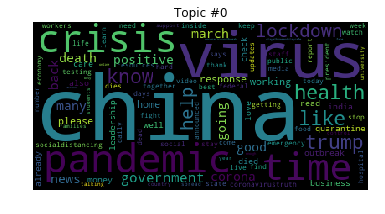

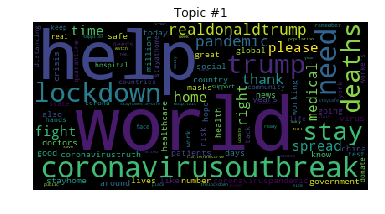

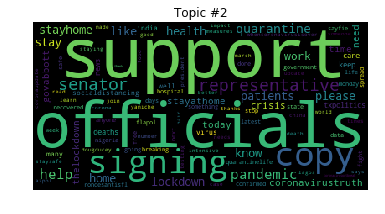

In [90]:
for t in range(ldamodel3.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel3.show_topic(t, 100))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show() 

In [92]:
def format_topics_sentences(ldamodel=None, corpus=document_term_matrix, texts=doc_complete):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel3[corpus]):
        row = row_list[0] if ldamodel3.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel3.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel3, corpus=document_term_matrix, texts=cleaned)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9298,"china, virus, pandemic, crisis, time, health, ...","[upload, coping, already, necessary, skills, e..."
1,1,1.0,0.7222,"world, help, coronavirusoutbreak, need, lockdo...","[heard, advised, self, isolate, months, govern..."
2,2,2.0,0.9389,"support, officials, signing, copy, representat...","[support, janelle, signing, copy, officials, g..."
3,3,1.0,0.4776,"world, help, coronavirusoutbreak, need, lockdo...","[america, underestimated, warnings, china, ita..."
4,4,1.0,0.9009,"world, help, coronavirusoutbreak, need, lockdo...","[anywhere, right, presuming, issue, isolation,..."


In [93]:
df_dominant_topic.groupby(["Dominant_Topic"]).count().sort_values(["Document_No"], ascending=False)

,Document_No,Topic_Perc_Contrib,Keywords,Text
Dominant_Topic,,,,
1.0,1861,1861,1861,1861
2.0,1575,1575,1575,1575
0.0,1564,1564,1564,1564


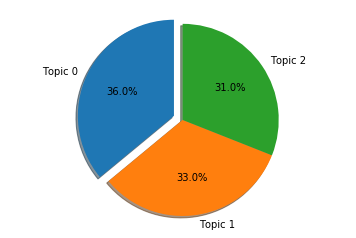

In [94]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Topic 0', 'Topic 1', 'Topic 2'
sizes = [36, 33, 31]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()